In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

sns.set_context("talk")

In [2]:
df = pd.read_csv("../outputs/mutational_model_stats.tsv", sep="\t")

In [3]:
df = df[df["variant_type"] != "CpG"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 303
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tri           176 non-null    object 
 1   ref           176 non-null    object 
 2   alt           176 non-null    object 
 3   variant_type  176 non-null    object 
 4   lvl           176 non-null    int64  
 5   mu            176 non-null    float64
 6   obs           176 non-null    float64
 7   pos           176 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 12.4+ KB


In [24]:
# A function to retrieve the standard error of a proportion
def sem(p, n): return np.sqrt((p*(1-p))/n)

In [27]:
model = smf.wls("obs ~ 1 - np.exp(mu)", data=df, weights=df["pos"]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                      -0.000
Model:                            WLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 09 Mar 2023   Prob (F-statistic):                nan
Time:                        13:28:46   Log-Likelihood:                 181.64
No. Observations:                 176   AIC:                            -361.3
Df Residuals:                     175   BIC:                            -358.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1240      0.006     22.235      0.000       0.113       0.135
==============================================================================
Omnibus:                       17.933   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.041
Skew:                           0.847   Prob(JB):                     2.70e-05
Kurtosis:                       3.038   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model = smf.wls("obs ~ mu", data=df, weights=df["pos"]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                       0.959
Model:                            WLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     4083.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          9.71e-123
Time:                        12:59:44   Log-Likelihood:                 463.00
No. Observations:                 176   AIC:                            -922.0
Df Residuals:                     174   BIC:                            -915.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0121      0.002      5.790      0.000       0.008       0.016
mu          2.574e+07   4.03e+05     63.897      0.000    2.49e+07    2.65e+07
==============================================================================
Omnibus:                       17.678   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.263
Skew:                          -0.482   Prob(JB):                     5.99e-08
Kurtosis:                       4.899   Cond. No.                     3.56e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
df["log_obs"] = np.log(1-df["obs"])
df["sqrt_mu"] = np.sqrt(df["mu"])

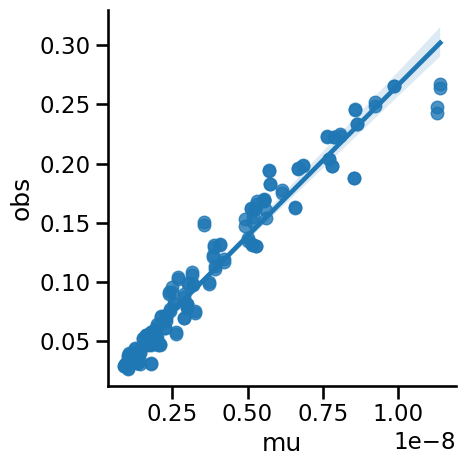

In [19]:
g = (sns.lmplot(data=df,
                x="mu",
                y="obs",
           )
    )

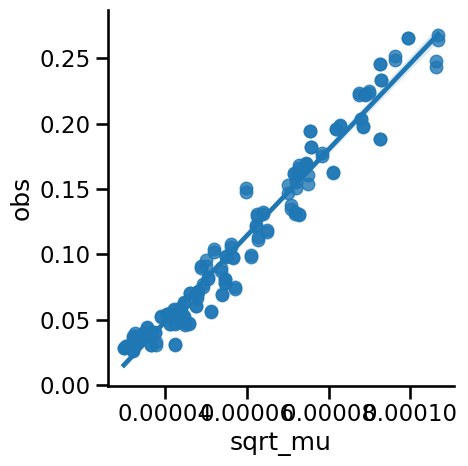

In [20]:
g = (sns.lmplot(data=df,
                x="sqrt_mu",
                y="obs",
           )
    )

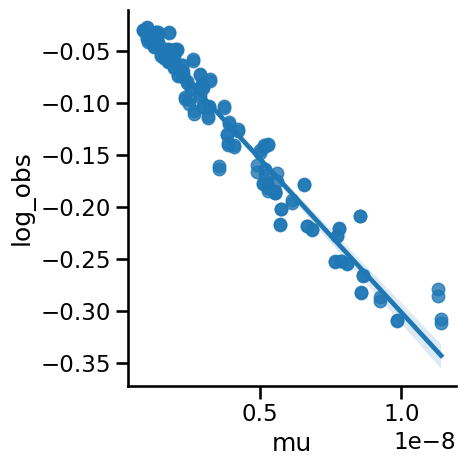

In [21]:
g = (sns.lmplot(data=df,
                x="mu",
                y="log_obs",
           )
    )